# Цель проекта

Имея подготовленные данные от крупного интернет-магазина провести приоритизацию гипотез и проанализировать результаты A/B теста

# План проекта

**Часть 1. Загрузка и предобработка данных**

**Часть 2.Приоритизация гипотез.**

   1. Применение фреймворка `ICE` для приоритизации гипотез.
   
   2. Применение фреймворка `RICE` для приоритизации гипотез.
   
   3. Выводы.
   
**Часть 3.  Анализ A/B-теста.**
   
 - Графики и перцентили
   1. Кумулятивная выручка по группам.
   2. Кумулятивный средний чек по группам.
   3. Относительное изменение кумулятивного среднего чека группы B к группе A.
   4. Кумулятивная конверсия по группам.
   5. Относительне изменение кумулятивной конверсии группы B к группе A.
   6. Количество заказов по пользователям.
   7. 95-й и 99-й перцентили количества заказов на пользователя.
   8. Стоимость заказов.
   9. 95-й и 99-й перцентили стоимости заказов.
 - Расчет статистической значимости  
   10. Различие в конверсии между группами по «сырым» данным.
   11. Различие в среднем чеке заказа между группами по «сырым» данным.
   12. Различие в конверсии между группами по «очищенным» данным.  
   13. Различие в среднем чеке заказа между группами по «очищенным» данным

**Часть 4. Выводы**

## Часть 1. Загрузка и предобработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


hypo = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
pd.options.display.max_colwidth = 200

In [2]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


посмотрим на данные

In [3]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [4]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Переведем дату в формат даты

In [5]:
visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

In [6]:
print(orders['date'].min(),orders['date'].max())
print(visitors['date'].min(),visitors['date'].max())

2019-08-01 00:00:00 2019-08-31 00:00:00
2019-08-01 00:00:00 2019-08-31 00:00:00


Учитывая, что все данные у нас за один месяц, то из даты оставим только день

In [7]:
orders['date'] = orders['date'].dt.day
visitors['date'] = visitors['date'].dt.day

## Часть 2.Приоритизация гипотез.

**1. Применение фреймворка `ICE` для приоритизации гипотез.**

Параметр фреймворка `ICE` рассчитывается по следующей формуле:

$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [8]:
hypo['ICE'] = (hypo['Impact']*hypo['Confidence'])/hypo['Efforts']

In [9]:
hypo[['Hypothesis','ICE']].sort_values(by='ICE',ascending=False).head(5)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000


**2. Применение фреймворка `RICE` для приоритизации гипотез.**

Параметр фреймворка `RICE` рассчитывается по следующей формуле:

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

In [10]:
hypo['RICE'] = (hypo['Reach']*hypo['Impact']*hypo['Confidence'])/hypo['Efforts']

In [11]:
hypo[['Hypothesis','RICE']].sort_values(by='RICE',ascending=False).head(5)

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2


**3. Выводы.**

  - посредством фреймворков ICE и RICE мы получили топ 5 гипотез (0,2,6,7,8)
  - изменение приоритизации обусловлено учетом охвата гипотезы, например акция на день рождения, безусловно, имеет сильноо влияние и характеризуется небольшой стоимостью, но количество имениников гораздо меньше числа покупателей

## Часть 3. Анализ A/B теста

### Графики и перцентили

**1. Кумулятивная выручка по группам**

In [12]:
#создадим массив уникальных значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 
#получим кумулятивные данные о заказах по дням
ordersAggregated = (
    datesGroups.apply(
        lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
        .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}),axis=1)
    .sort_values(by=['date','group'])
)

In [13]:
#аналогичные операции применим к датасету посетителей
visitorsAggregated = (
    datesGroups.apply(
        lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
        .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group']) 
)

In [14]:
#объединим кумулятивные данные
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']) 
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [15]:
#получим датасеты для двух групп
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

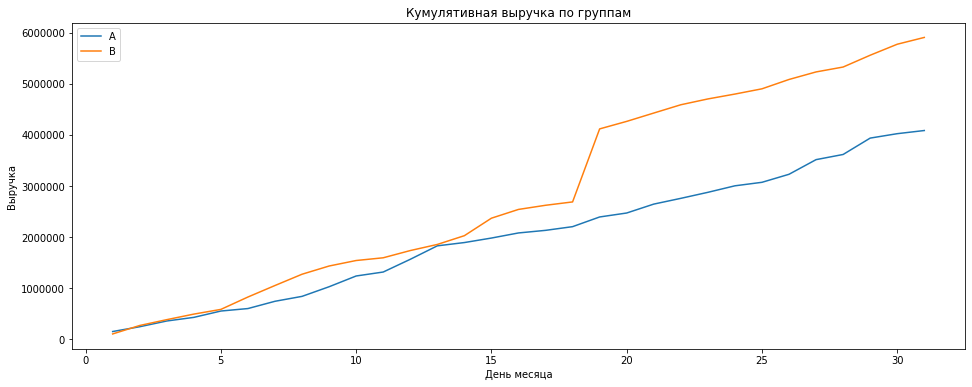

In [16]:
plt.figure(figsize=(16,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend() 
plt.title('Кумулятивная выручка по группам')
plt.xlabel('День месяца')
plt.ylabel('Выручка')
plt.show()

Для группы А характерно равномерное увеличение выручки. У группы Б наблюдается `резкий скачок выручки`, похоже на аномально дорогие покупки или увеличенное число заказов

**2. Кумулятивный средний чек по группам.**

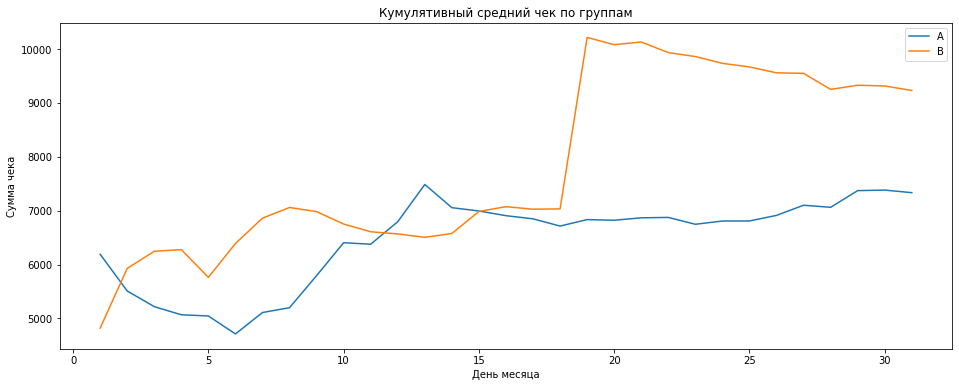

In [17]:
plt.figure(figsize=(16,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('День месяца')
plt.ylabel('Сумма чека')
plt.show()

Средний чек группы А примерно через 15 дней установился на значении около `7 тысяч`,ближе к концу теста наблюдается небольшой рост.

На графике группы Б наблюдается внушительный скачок, та самая аномально дорогая покупка или покупки.

**3. Относительное изменение кумулятивного среднего чека группы B к группе A.**

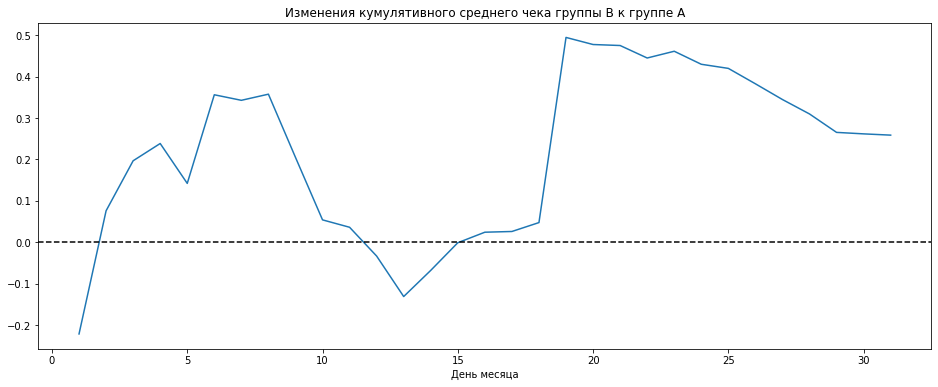

In [18]:
mergedCumulativeRevenue = cumulativeRevenueA\
.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(16,6))
plt.plot\
(mergedCumulativeRevenue['date'], \
 (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('День месяца')
plt.show()

В первую половину месяца наблюдаются сильные колебания, затем - та самая аномалия. К концу теста график стабилизировался около значения `0.3`

**4. Кумулятивная конверсия по группам.**

In [19]:
#расчитаем значение конверсии
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

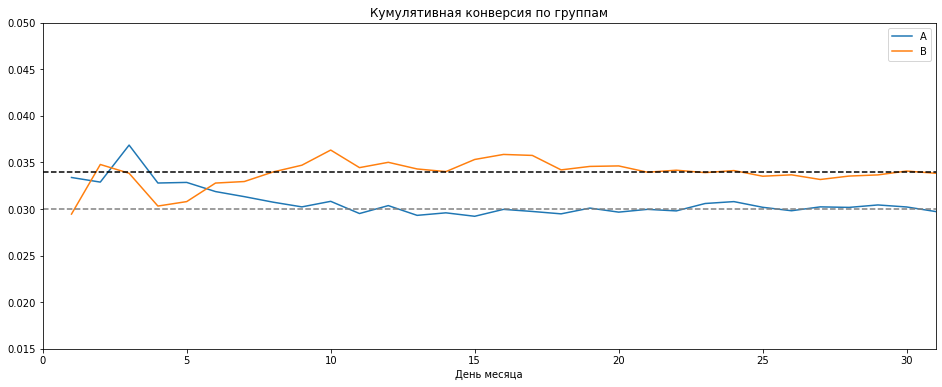

In [20]:
plt.figure(figsize=(16,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend() 
plt.title('Кумулятивная конверсия по группам')
plt.xlabel('День месяца')
plt.axis([0, 31, 0.015, 0.05])
plt.axhline(y=0.034, color='black', linestyle='--')
plt.axhline(y=0.03, color='grey', linestyle='--')
plt.show()

Конверсия группы А стабилизировалась раньше и остановилась на значении около 3%, но в конце теста заметна тенденция к снижению

Группа Б спустя неделю от начала теста обогнала группу А по конверсии и ближе к концу теста установиласть на уровне 3,4%, но стабилизировалась заметно позже.

**5. Относительне изменение кумулятивной конверсии группы B к группе A.**

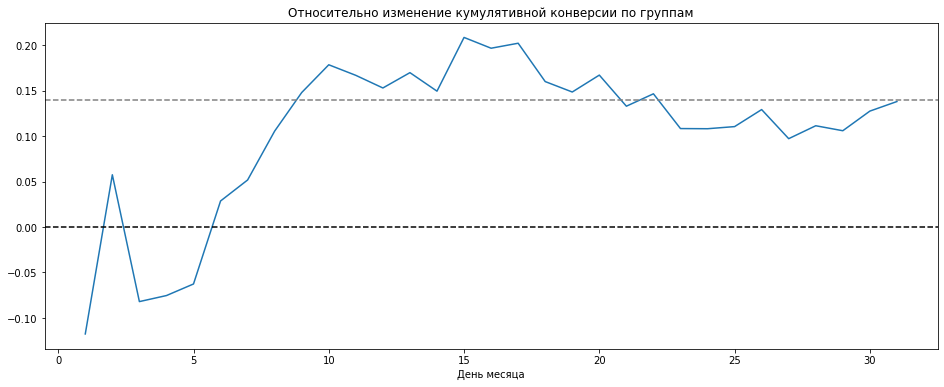

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(16,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.title('Относительно изменение кумулятивной конверсии по группам')
plt.xlabel('День месяца')
plt.show()

Относительное изменение конверсии группы Б к группе А к концу теста достигло значения 14% и продолжает расти, но группа Б стабильно лучше

**6. Количество заказов по пользователям.**

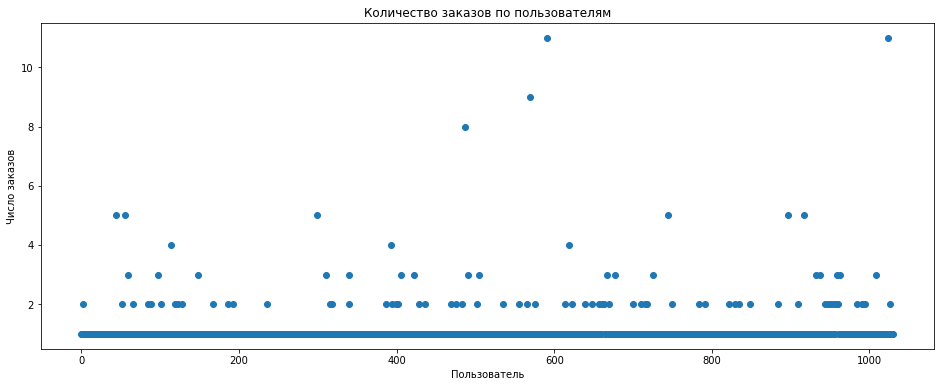

In [22]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['userId','orders']
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(16,6))
plt.scatter(x_values,ordersByUsers['orders'])
plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователь')
plt.ylabel('Число заказов')
plt.show()

Подавляющее большинство пользователей совершили не более одной покупки, но имеются выбросы вплоть до 10 и более заказов. Продолжим исследование и взглянем на перцентили

**7. 95-й и 99-й перцентили количества заказов на пользователя.**

In [23]:
print('95-й перцентиль равен {:.0f} покупкам'.format(np.percentile(ordersByUsers['orders'],95)))
print('99-й перцентиль равен {:.0f} покупкам'.format(np.percentile(ordersByUsers['orders'],99)))

95-й перцентиль равен 2 покупкам
99-й перцентиль равен 4 покупкам


Всего 5% пользователей совершили больше 2 заказов и только 1% - больше 4

**8. Стоимость заказов.**

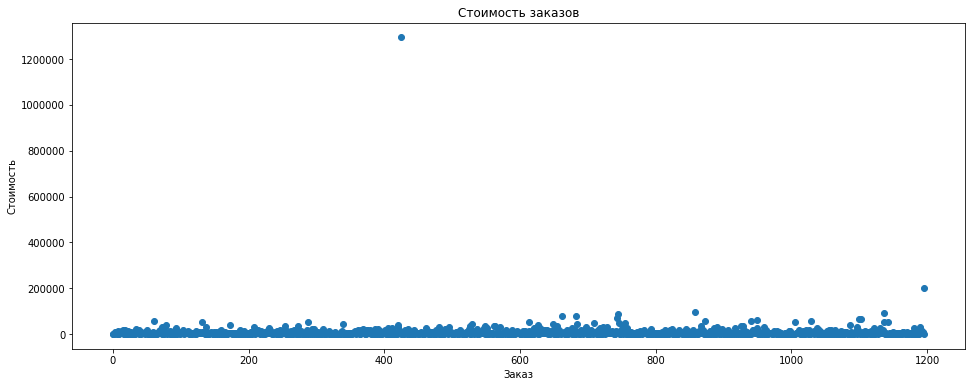

In [24]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(16,6))
plt.scatter(x_values,orders['revenue'])
plt.title('Стоимость заказов')
plt.xlabel('Заказ')
plt.ylabel('Стоимость')
plt.show()

Аномально дорогие заказы и правда имеют место. Посчитаем перцентили

**9. 95-й и 99-й перцентили стоимости заказов.**

In [25]:
print('95-й перцентиль составляет {:.0f}'.format(np.percentile(orders['revenue'],95)))
print('99-й перцентиль составляет {:.0f}'.format(np.percentile(orders['revenue'],99)))

95-й перцентиль составляет 28000
99-й перцентиль составляет 58233


Всего 5% заказов было совершено на сумму более чем `28 тысяч` и только 1% заказов дороже `58 тысяч`

## Расчет статистической значимости  

**10. Различие в конверсии между группами по «сырым» данным.**

Потребуется объемная подготовка данных

In [26]:
#получим количество пользователей в день для группы А
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
#суммарное количество пользователей группы А
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
#аналогично для группы Б
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
#суммарное количество заказов и выручка в день для группы А
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
#суммарное количество заказов и выручка
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

In [27]:
#аналогично для группы Б
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
#объединим все переменные в один датасет
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

Сформулируем нулевую и альтернативную гипотезу:

1) H0 - статистически значимых различий в конверсии между группами нет

2) H1 - статистически значимые различия в конверсии между группами есть

In [28]:
#количество заказов на пользователя
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']
#подготовим выборки к проверке критерием Манна-Уитни
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("p-value равно {:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]))
print("Относительный прирост конверсии группы Б {:.1%}".format(sampleB.mean()/sampleA.mean()-1)) 

p-value равно 0.017
Относительный прирост конверсии группы Б 13.8%


Полученный параметр p-value (`0.017`) меньше чем `0.05` (критический уровень статистической значимости), а значит нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, мы отвергаем.

Различие в конверсии по "сырым данным" составляет `13.8%`

**11. Различие в среднем чеке заказа между группами по «сырым» данным.**

Сформулируем нулевую и альтернативную гипотезу:

1) H0 - статистически значимых различий в средних чеках между группами нет

2) H1 - статистически значимые различия в средних чеках между группами есть

In [29]:
print("P-value равно {:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative='two-sided')[1]))
print("Различия в среднем чеке {:.1%}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-value равно 0.729
Различия в среднем чеке 25.9%


По расчитанному p-value нет причин отвергать нулевую гипотезу о том, что в среднем чеке нет статистически значимых отличий.
В то же время средний чек группы Б почти на `26%` больше чека группы А

**12. Различие в конверсии между группами по «очищенным» данным.**

Сформулируем нулевую и альтернативную гипотезу:

1) H0 - статистически значимых различий в конверсии между группами нет

2) H1 - статистически значимые различия в конверсии между группами есть

In [30]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 3]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

In [31]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

print("p-value равно {:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1], alternative='two-sided'))
print("Относительный прирост конверсии группы Б {:.1%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value равно 0.009
Относительный прирост конверсии группы Б 14.8%


`P-value` не изменился, а значит статистически значимые отличия все еще есть. Прирост ковнерсии по очищенным данным увеличился на `1%`

**13. Различие в среднем чеке заказа между группами по «очищенным» данным.**

Сформулируем нулевую и альтернативную гипотезу:

1) H0 - статистически значимых различий в средних чеках между группами нет

2) H1 - статистически значимые различия в средних чеках между группами есть

In [32]:
print("P-value равно {:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative='two-sided')[1]))

print("Различия в среднем чеке {:.1%}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

P-value равно 0.977
Различия в среднем чеке -1.7%


P-value все так же говорит о том, что статистически значимых отличий нет, но различия в среднем чеке стали отрицательными, а именно `-1.7%`, можно сказать, что весь прирост среднего чека сделали аномальные заказы

## Часть 4. Выводы



- Основываясь на полученных данных стоит продолжить проведение теста для получения окончательных результатов по среднему чеку.

- Была проведена приоритизация гипотез посредством фреймворков `ICE` и `RICE`. Отличие в полученных результатах обусловлено учетом охвата гипотезы (речь о фреймворке `RICE`)

- Обнаружены выбросы в "сырых данных" для группы `Б`, они отчетливо видны на графиках `кумулятивных среднего` чека и `выручки`

- Как по "сырым" так и по "очищенным" данным имеется статистическая значимое различие конверсий между группами, и конверсия группы Б  (по "очищенным" данным) на `14.8%` больше.

- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий, но средние чеки двух групп после фильтрации стали очень близки.

Графики, которые могут помочь с выводом:

In [33]:
#заказы по очищенным данным
orders_filt = orders[~orders['visitorId'].isin(abnormalUsers)]

In [34]:
#аналогичные операции, что были в начале части анализа A/B - теста
datesGroups_filt = orders_filt[['date','group']].drop_duplicates() 
ordersAggregated_filt = (
    datesGroups.apply(
        lambda x: orders_filt[np.logical_and(orders_filt['date'] <= x['date'], orders_filt['group'] == x['group'])]
        .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}),axis=1)
    .sort_values(by=['date','group'])
)

cumulativeData_filt = ordersAggregated_filt.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']) 
cumulativeData_filt.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeRevenueA_filt = cumulativeData_filt[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB_filt = cumulativeData_filt[cumulativeData['group']=='B'][['date','revenue', 'orders']]

cumulativeData_filt['conversion'] = cumulativeData_filt['orders']/cumulativeData_filt['visitors']
cumulativeDataA_filt = cumulativeData_filt[cumulativeData_filt['group']=='A']
cumulativeDataB_filt = cumulativeData_filt[cumulativeData_filt['group']=='B']

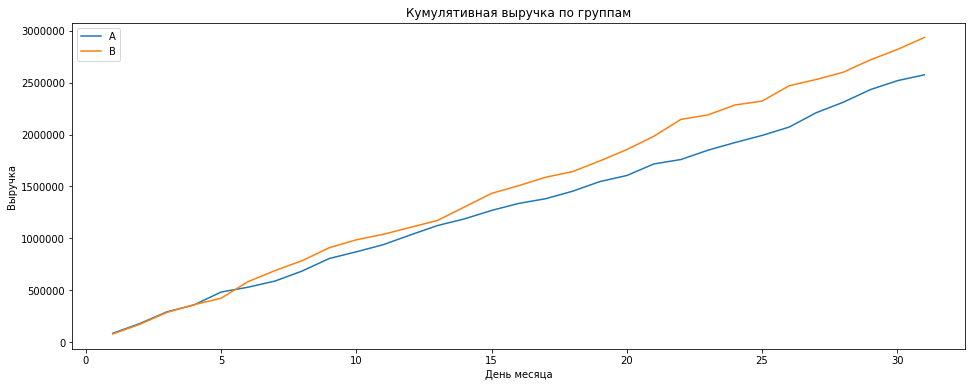

In [35]:
plt.figure(figsize=(16,6))
plt.plot(cumulativeRevenueA_filt['date'], cumulativeRevenueA_filt['revenue'], label='A')
plt.plot(cumulativeRevenueB_filt['date'], cumulativeRevenueB_filt['revenue'], label='B')
plt.legend() 
plt.title('Кумулятивная выручка по группам')
plt.xlabel('День месяца')
plt.ylabel('Выручка')
plt.show()

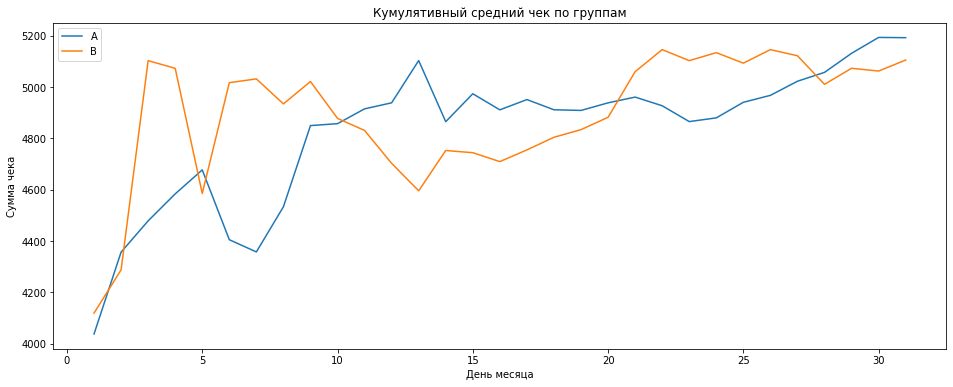

In [36]:
plt.figure(figsize=(16,6))
plt.plot(cumulativeRevenueA_filt['date'], cumulativeRevenueA_filt['revenue']/cumulativeRevenueA_filt['orders'], label='A')
plt.plot(cumulativeRevenueB_filt['date'], cumulativeRevenueB_filt['revenue']/cumulativeRevenueB_filt['orders'], label='B')
plt.legend() 
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('День месяца')
plt.ylabel('Сумма чека')
plt.show()

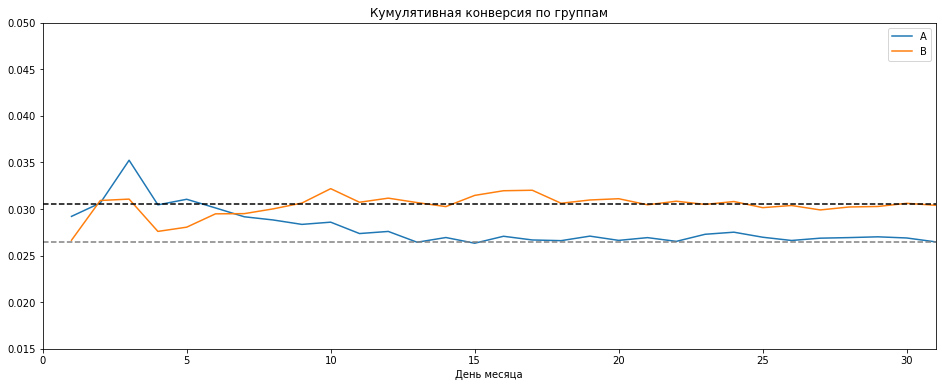

In [37]:
plt.figure(figsize=(16,6))
plt.plot(cumulativeDataA_filt['date'], cumulativeDataA_filt['conversion'], label='A')
plt.plot(cumulativeDataB_filt['date'], cumulativeDataB_filt['conversion'], label='B')
plt.legend() 
plt.title('Кумулятивная конверсия по группам')
plt.xlabel('День месяца')
plt.axis([0, 31, 0.015, 0.05])
plt.axhline(y=0.0305, color='black', linestyle='--')
plt.axhline(y=0.0265, color='grey', linestyle='--')
plt.show()

- Группа `Б` лидирует как по кумулятивной выруче так и по кумулятивной конверсии, а вот средний чек так и продолжает колебаться. 
- Останавливаем тест и фиксируем победу группы `Б`